## Clinical Data Analysis with Mimim 3 Demo Database Using SQLITE and Jupiter Notebook 

For this tutorial I am going to query data from the Mimic 3 Demo Database. The Mimic 3 Demo Database is a subset of the original database in that it contians 100 of the original 40,000 patients.  This database contains deidentified health care data of patients from intensive care units at Beth Israel Deaconess Medical Center between 2001 and 2012[1].  The demo database is readily available via this link: https://physionet.org/content/mimiciii-demo/1.4/

For this tutorial I will using sqlite, python and jupyter notebook.  

This Jupyter Notebook provides an introduction to the use of the SQL select statement for purposes of querying data from the Mimic 3 Demo Database.  Tools that are also used include Python, Pandas, Seaborn, SQL and SQLite.  Within this tutorial I utilized these tools to build amulti-table query in order to query accucheck data from patients in the ICU and show the trends from admission through discharge.

## Part I

Import the required libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sql
%matplotlib inline

Now I am going to mount the google drive where the sqlite file is that houses the mimic 3 database.  In order to do this you need to proceed through the following steps.

1. Upload the mimic3 demo database that you create after downloading it from physionet.org and following the instructions for creating the file using the information from within the sqlite folder within the buildmimic directory.

2. Use the following 2 statements and then run the cell.  

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


3. Once the above is done and you have followed the prompt to give authority to access your drive then copy the path into that which is seen below:

```
("sqlite://///content/drive/your_path")
```



In [ ]:
from sqlalchemy import create_engine
conn = create_engine("sqlite://///content/drive/MyDrive/data/mimic3.db")

Now I will query the database with a focus on the chartevents table.  This table has clinician charted data that includes measurements such as patient temperature, heart rate and blood pressure. Below I will describe step by step how to create this query.
    
1.   In the call to read_sql(), two parameters will be used.  The select statment enclosed in triple quotes will be the first parameter and the second parameter will include the newly created conn variable assigned
to con. 
2.   Next, using the pandas dataframe method head() I will output the first 10 lines. *As a note if you were to use df.head() without a number as a parameter, which is the default, head() will return the first 5 rows.


In [ ]:
df = pd.read_sql("""select * from chartevents""", con = conn)
df.head(10)

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped
0,5279021,40124,126179,279554.0,223761,2130-02-04 04:00:00,2130-02-04 04:35:00,19085,95.9,95.9,?F,0.0,0.0,None,None
1,5279022,40124,126179,279554.0,224695,2130-02-04 04:25:00,2130-02-04 05:55:00,18999,2222221.7,2222221.7,cmH2O,0.0,0.0,None,None
2,5279023,40124,126179,279554.0,220210,2130-02-04 04:30:00,2130-02-04 04:43:00,21452,15.0,15.0,insp/min,0.0,0.0,None,None
3,5279024,40124,126179,279554.0,220045,2130-02-04 04:32:00,2130-02-04 04:43:00,21452,94.0,94.0,bpm,0.0,0.0,None,None
4,5279025,40124,126179,279554.0,220179,2130-02-04 04:32:00,2130-02-04 04:43:00,21452,163.0,163.0,mmHg,0.0,0.0,None,None
5,5279026,40124,126179,279554.0,220180,2130-02-04 04:32:00,2130-02-04 04:43:00,21452,81.0,81.0,mmHg,0.0,0.0,None,None
6,5279027,40124,126179,279554.0,220181,2130-02-04 04:32:00,2130-02-04 04:43:00,21452,101.0,101.0,mmHg,0.0,0.0,None,None
7,5279028,40124,126179,279554.0,220046,2130-02-04 04:34:00,2130-02-04 04:34:00,19085,120.0,120.0,bpm,0.0,0.0,None,None
8,5279029,40124,126179,279554.0,220047,2130-02-04 04:34:00,2130-02-04 04:34:00,19085,50.0,50.0,bpm,0.0,0.0,None,None
9,5279030,40124,126179,279554.0,223751,2130-02-04 04:34:00,2130-02-04 04:34:00,19085,170.0,170.0,mmHg,0.0,0.0,None,None


Below I will select all columns from the chartevents table but now will use the keyword **where** in order to filter the data so only the patient data associated with row_id equal to 5279021 is displayed.

In [ ]:
df = pd.read_sql("""select * from chartevents where row_id = 5279021""", con = conn)
df

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped
0,5279021,40124,126179,279554.0,223761,2130-02-04 04:00:00,2130-02-04 04:35:00,19085,95.9,95.9,?F,0.0,0.0,None,None


Now again I am going to filter the data, but this time I want to query data from there patients.  In this instance I need to use the **in** keyword with **where** so as to query patient data associated with the row_id's 5279021, 5279022 and 5279023.

In [ ]:
df = pd.read_sql("""select * from chartevents where row_id in (5279021, 5279022, 5279023)""", con = conn)
df

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped
0,5279021,40124,126179,279554.0,223761,2130-02-04 04:00:00,2130-02-04 04:35:00,19085,95.9,95.9,?F,0.0,0.0,None,None
1,5279022,40124,126179,279554.0,224695,2130-02-04 04:25:00,2130-02-04 05:55:00,18999,2222221.7,2222221.7,cmH2O,0.0,0.0,None,None
2,5279023,40124,126179,279554.0,220210,2130-02-04 04:30:00,2130-02-04 04:43:00,21452,15.0,15.0,insp/min,0.0,0.0,None,None


## Part 2 

In this section we are going to start working on building a multitable query in order to visualize patients glucose values during the duration of their stay in the ICU. 

First we need to query the d_items table to find any labels that have the word glucose in it.  

In [ ]:
df = pd.read_sql("""select * from d_items where label like '%glucose%'""", con = conn)

Now using the pandas unique() method we can get the list of all the unique labes to find the appropriate one for the query will be building below.

In [ ]:
print(df.label.unique())

['fingerstick glucose' 'Fingerstick Glucose' 'Glucose (70-105)'
 'Glucose Monitor #' 'FINGERSTICK GLUCOSE.' 'Blood Glucose' 'BloodGlucose'
 'Urine Glucose' 'Glucose' 'abg: glucose' 'finger stick glucose'
 'Glucose (serum)' 'Glucose finger stick' 'Glucose (whole blood)'
 'Glucose_ApacheIV' 'GlucoseScore_ApacheIV' 'Boost Glucose Control (1/4)'
 'Boost Glucose Control (1/2)' 'Boost Glucose Control (3/4)'
 'Boost Glucose Control (Full)' 'Glucose (whole blood) (soft)']


Now I am going to build a multi table query using an "inner join" which returns records that have matching values in all tables involved.  The tables in this query include chartevents, d_items, icustays and admissions. The chartevents table which as explained previously houses the values for clinician charted glucose data.  D_items includes the labels used for clinician charted data.  The labels column has significance as I am going to use the specific label 'Fingerstick Glucose', found in the list above.  The icustays table contains data such as the location of where the patient is at such as MICU (Medical Intensive Care Unit).  

Another note to mention before running this query would be how the query is built.  In this select query we create an alias for each table such as "chartevents c" as can be seen below. Now instead of using chartevents.icustay_id to select the icustay_id column from chartevents we can use "c.icustay_id" instead.  

To join two tables together as part of an INNER JOIN you join each on their common column name.  As an example, to join both the chartevents and icustays tables together in this manner you use "INNER JOIN chartevents c ON d.itemid = c.itemid" where in this case their common column name is itemid.

I also use the WHERE keyword to filter the data by the patients glucose level as well by discharge location such that only discharge location 'DEAD/EXPIRED' is excluded. 

Lastly, I will use "ORDER BY" in order to list the records in ascending order by charted time. 

*As a note - An accucheck is a clinical term for obtaining a one time fingerstick blood sample for a diabetic patient using a glucometer which provides a real time glucose level result.  Based on the result, the clinician if necessary is able to treat the patient accordingly based on an ordered set of parameters.

In [ ]:
query = """select c.subject_id
                    , round((strftime('%s',c.charttime)-strftime('%s',icu.intime))/60.0/60.0) as Number_Of_Hours_In_The_ICU
                    , c.icustay_id
                    , icu.first_careunit
                    , icu.last_careunit
                    ,  d.label as Accucheck
                    , c.valuenum as Accucheck_Value
                    , a.discharge_location
                 from d_items d
                 inner join chartevents c
                 on d.itemid = c.itemid
                 inner join admissions a
                 on c.subject_id = a.subject_id
                 inner join icustays icu
                 on c.icustay_id = icu.icustay_id
                 WHERE d.label = 'Fingerstick Glucose' AND  a.discharge_location != 'DEAD/EXPIRED'
                 ORDER BY c.charttime
                 """

clinical_data = pd.read_sql_query(query,conn)
clinical_data

,subject_id,Number_Of_Hours_In_The_ICU,icustay_id,first_careunit,last_careunit,Accucheck,Accucheck_Value,discharge_location
0,10088,12.0,256345.0,MICU,MICU,Fingerstick Glucose,159.0,SNF
1,10088,12.0,256345.0,MICU,MICU,Fingerstick Glucose,159.0,SNF
2,10088,12.0,256345.0,MICU,MICU,Fingerstick Glucose,159.0,SNF
3,10088,14.0,256345.0,MICU,MICU,Fingerstick Glucose,148.0,SNF
4,10088,14.0,256345.0,MICU,MICU,Fingerstick Glucose,148.0,SNF
...,...,...,...,...,...,...,...,...
676,10127,507.0,271544.0,TSICU,TSICU,Fingerstick Glucose,136.0,REHAB/DISTINCT PART HOSP
677,10127,513.0,271544.0,TSICU,TSICU,Fingerstick Glucose,113.0,REHAB/DISTINCT PART HOSP
678,10127,520.0,271544.0,TSICU,TSICU,Fingerstick Glucose,118.0,REHAB/DISTINCT PART HOSP
679,10127,525.0,271544.0,TSICU,TSICU,Fingerstick Glucose,113.0,REHAB/DISTINCT PART HOSP


Now I will plot the glucose vales over time for the patients' in icu so we can visualize the trends from admission until the end of the icu stay.  Here I am going to use seaborn to visualize the data.
1. First I will import seaborn and give it the alias sns
2. I will set the font to 2 so it can be easily read.
3. I will use relplot and in the call and use getlabels as the parameter for data, number of hour in the icu from the dataframe for x as well as the temperature data as valuenum from the dataframe for y.
4. I am going to set the height of the graph to 6.

Text(0.5, 1.0, 'Patients glucose level during the duration of their stay in the ICU.')

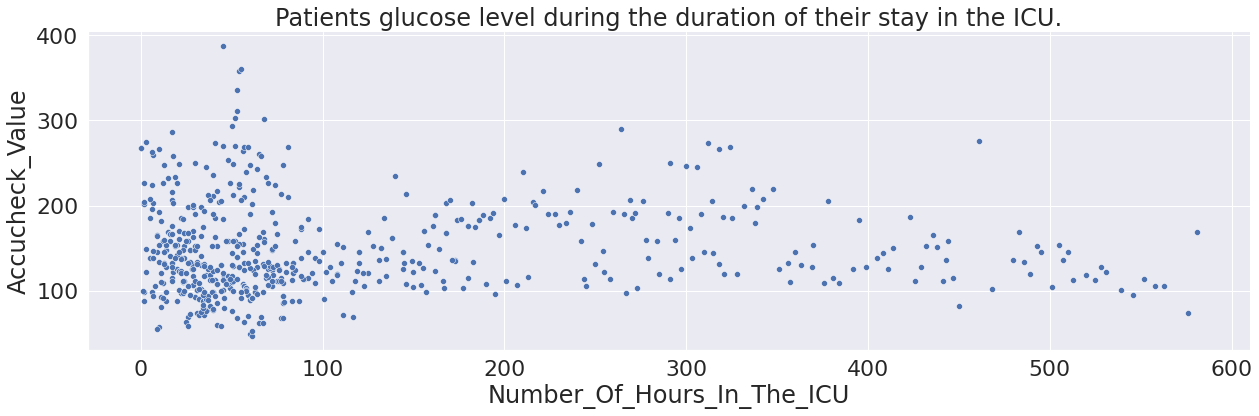

In [ ]:
import seaborn as sns
sns.set(font_scale=2)
sns.relplot(data=clinical_data, x="Number_Of_Hours_In_The_ICU", y="Accucheck_Value", height=6, aspect=3)

plt.title('Patients glucose level during the duration of their stay in the ICU.')

Now we can see the trends of patients' glucose readings over time.  The values range from around 40 to just over 300 at admission and then over the length of the admission begin to stablize between 100 and 200.

# References

Goldberger, A., Amaral, L., Glass, L., Hausdorff, J., Ivanov, P. C., Mark, R., ... & Stanley, H. E. (2000). PhysioBank, PhysioToolkit, and PhysioNet: Components of a new research resource for complex physiologic signals. Circulation [Online]. 101 (23), pp. e215–e220.